In [293]:

import csv
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline

In [294]:
pd.set_option('display.max_columns', None)

In [295]:
df = pd.read_csv('capstone2edited.csv')

df['registration_init_time'] =  pd.to_datetime(df['registration_init_time'], format='%Y-%m-%d')
df['transaction_date'] =  pd.to_datetime(df['transaction_date'], format='%Y-%m-%d')
df['membership_expire_date'] =  pd.to_datetime(df['membership_expire_date'], format='%Y-%m-%d')
df['listen_date'] =  pd.to_datetime(df['listen_date'], format='%Y-%m-%d')
df = df.drop(columns = 'registration_day')
df = df[(df.age > 10) & (df.age < 100)]

In [296]:
df

,userid,is_churn,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,listen_date,num_unq,total_secs,percent_25,percent_50,percent_100
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0,2017-03-20,9.0,6986.509,0.000000,0.125000,0.812500
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,90.0,300.0,300.0,0.0,2017-03-11,2017-06-15,0.0,2017-03-31,82.0,67810.467,0.430631,0.102703,0.409009
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25,41.0,30.0,99.0,99.0,1.0,2016-10-01,2017-09-18,0.0,2017-03-31,62.0,239882.241,0.009128,0.007099,0.979716
3,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.0,28.0,female,3.0,2014-02-02,38.0,410.0,1788.0,1788.0,0.0,2017-03-24,2018-05-13,0.0,2017-03-31,72.0,290831.795,0.066838,0.017138,0.890317
4,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,13.0,21.0,female,9.0,2014-02-12,38.0,90.0,477.0,477.0,0.0,2017-03-07,2017-07-07,0.0,2017-03-31,99.0,179129.056,0.260519,0.077887,0.623098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333297,SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=,0,15.0,19.0,male,9.0,2011-08-23,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-05-20,0.0,2017-03-30,50.0,107817.992,0.278755,0.043302,0.645467
333298,5NE9tsGhg7HbFNMdPT+3tytaIKG5013bBQG2vQTe+OI=,0,4.0,23.0,female,9.0,2011-08-26,37.0,30.0,149.0,149.0,1.0,2017-03-26,2017-04-25,0.0,2017-03-29,26.0,11941.211,0.333333,0.177083,0.427083
333299,/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=,0,8.0,25.0,female,7.0,2011-08-30,41.0,30.0,149.0,149.0,1.0,2017-03-17,2017-04-17,0.0,2017-03-31,96.0,125205.826,0.177542,0.039454,0.737481
333300,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,13.0,28.0,male,7.0,2011-08-31,40.0,30.0,149.0,149.0,1.0,2017-03-04,2017-04-03,0.0,2017-03-31,70.0,77031.435,0.124352,0.018135,0.847150


In [297]:
df.is_churn.describe()

# Around 8% of the users in our dataset have churned

totusers = len(df['userid'])

# define number of total users

In [298]:
not_churn = df[df['is_churn'] == 0]
is_churn = df[df['is_churn'] == 1]

{'whiskers': [<matplotlib.lines.Line2D at 0x16a9c2683d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16a9c268af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16a9c268040>,
 'medians': [<matplotlib.lines.Line2D at 0x16a9c272250>,
 'fliers': [],
 'means': []}

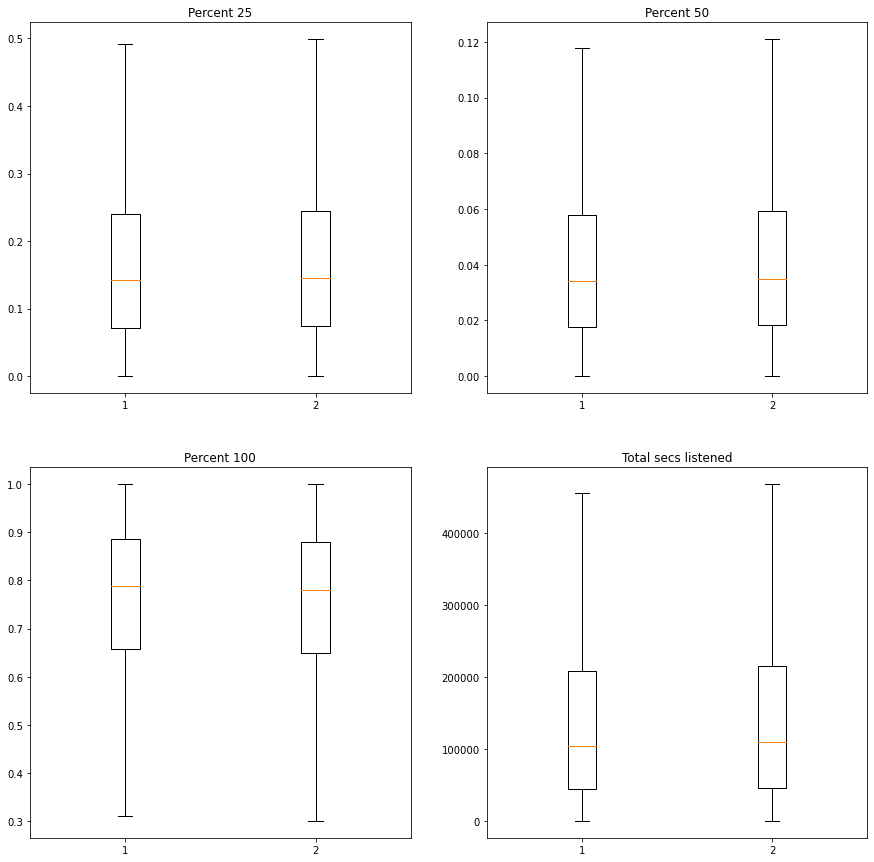

In [299]:
not_churn = df[df['is_churn'] == 0]
is_churn = df[df['is_churn'] == 1]


fig, ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0,0].set_title('Percent 25')
ax[0,0].boxplot([not_churn['percent_25'],is_churn['percent_25']], showfliers = False)
ax[0,1].set_title('Percent 50')
ax[0,1].boxplot([not_churn['percent_50'],is_churn['percent_50']], showfliers = False)
ax[1,0].set_title('Percent 100')
ax[1,0].boxplot([not_churn['percent_100'],is_churn['percent_100']], showfliers = False)
ax[1,1].set_title('Total secs listened')
ax[1,1].boxplot([not_churn['total_secs'],is_churn['total_secs']], showfliers = False)

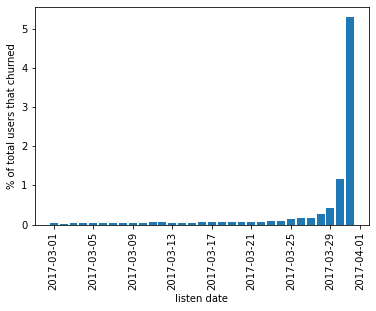

In [300]:
listen = df.groupby('listen_date').sum()['is_churn'] / totusers *100

plt.bar(listen.index, listen.values)
plt.xlabel('listen date')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

# At first glance, no correlation between listening habits and user churn. Though, most listeners at the end of March
# appeared to have churned?


{'whiskers': [<matplotlib.lines.Line2D at 0x16aa3f8bbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x16aa3f94340>,
 'boxes': [<matplotlib.lines.Line2D at 0x16aa3f8b850>,
 'medians': [<matplotlib.lines.Line2D at 0x16aa3f94a60>,
 'fliers': [<matplotlib.lines.Line2D at 0x16aa3f94df0>,
 'means': []}

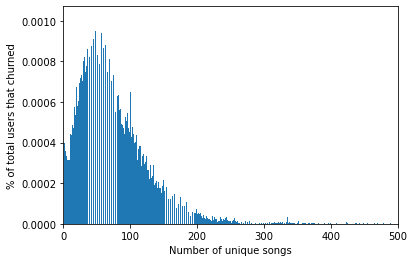

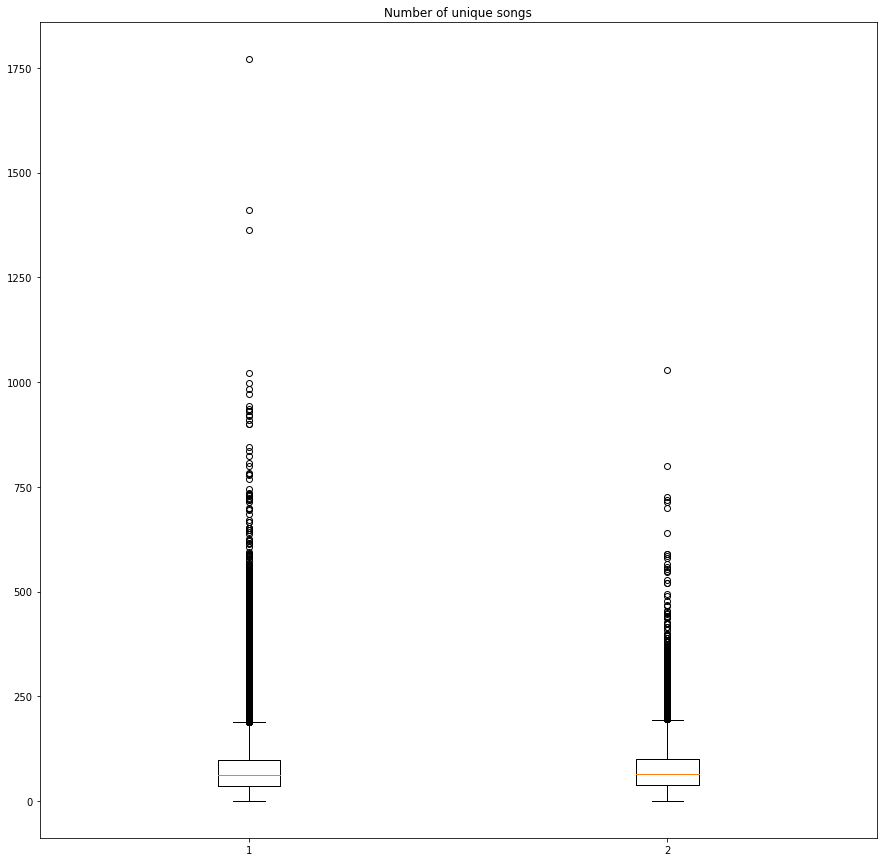

In [301]:
unq = df.groupby('num_unq').sum()['is_churn']
unq = unq / totusers
plt.bar(list(unq.index), list(unq))
plt.xlabel('Number of unique songs')
plt.ylabel('% of total users that churned')
plt.xlim([0,500])

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set_title('Number of unique songs')
ax.boxplot([not_churn['num_unq'],is_churn['num_unq']])

([<matplotlib.axis.XTick at 0x16aa402e1f0>,
 [Text(0, 0, ''), Text(0, 0, '')])

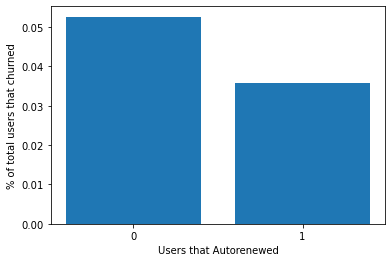

In [302]:
autorenew = df.groupby('is_auto_renew').sum()['is_churn']
autorenew = autorenew / totusers
plt.bar(list(autorenew.index), list(autorenew))
plt.xlabel('Users that Autorenewed')
plt.ylabel('% of total users that churned')
plt.xticks(ticks = [0,1])

# users that did not auto-renew were more likely to churn. 

([<matplotlib.axis.XTick at 0x16aa50c74c0>,
 [Text(0, 0, ''), Text(0, 0, '')])

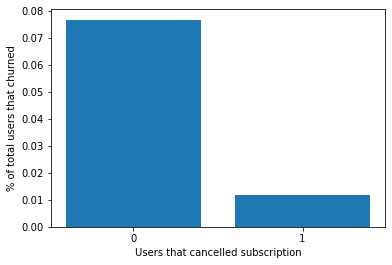

In [303]:
cancel = df.groupby('is_cancel').sum()['is_churn']
cancel = cancel / totusers
plt.bar(list(cancel.index), list(cancel))
plt.xlabel('Users that cancelled subscription')
plt.ylabel('% of total users that churned')
plt.xticks(ticks = [0,1])

# members that choose to cancel are less likely to churn?? possibly because most subscription cancellations are due to
# a plan change, not because the user is actually cancelling their subscriptions forever.

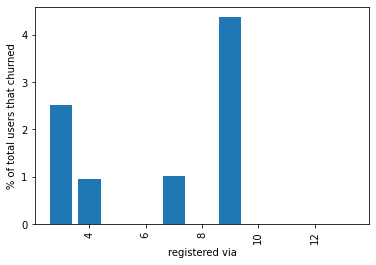

In [304]:
reg = df.groupby('registered_via').sum()['is_churn'] / totusers *100

plt.bar(reg.index, reg.values)
plt.xlabel('registered via')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

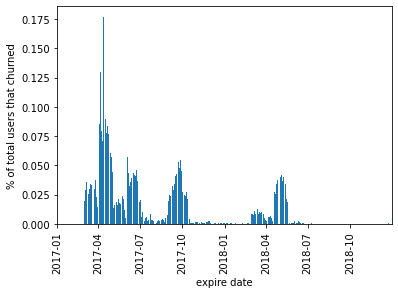

In [305]:
expire = df.groupby('membership_expire_date').sum()['is_churn'] / totusers *100
plt.bar(expire.index, expire.values)
plt.xlabel('expire date')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.xlim([datetime.date(2017, 1, 1), datetime.date(2018, 12,31)])
plt.show()

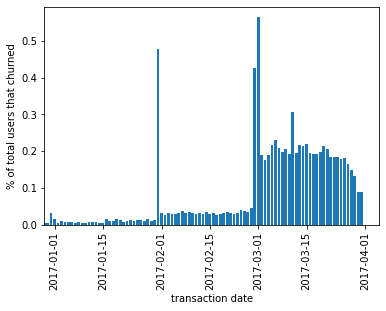

In [306]:

transaction = df.groupby('transaction_date').sum()['is_churn'] / totusers *100

plt.bar(transaction.index, transaction.values)
plt.xlabel('transaction date')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.xlim([datetime.date(2016, 12, 29), datetime.date(2017, 4,5)])
plt.show()

# high volume of users who conducted transactions at end of jan and feb churned

In [307]:
df['year'] = pd.to_datetime(df['registration_init_time']).dt.to_period('Y')

In [308]:
df['year'] = df.year.astype(str)
regtime = df.groupby('year').sum()['is_churn'] / totusers *100
df.dtypes

userid                            object
is_churn                           int64
city                             float64
age                              float64
gender                            object
registered_via                   float64
registration_init_time    datetime64[ns]
payment_method_id                float64
payment_plan_days                float64
plan_list_price                  float64
actual_amount_paid               float64
is_auto_renew                    float64
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                        float64
listen_date               datetime64[ns]
num_unq                          float64
total_secs                       float64
percent_25                       float64
percent_50                       float64
percent_100                      float64
year                              object
dtype: object

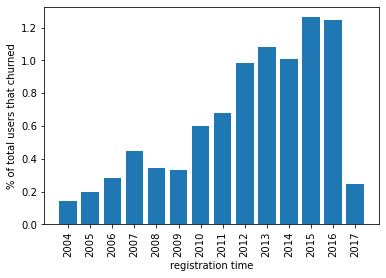

In [309]:

plt.bar(regtime.index, regtime.values)
plt.xlabel('registration time')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

# higher users churned when they registered  2015-2016

In [310]:
df.loc[df['actual_amount_paid'].between(0,99, 'both'),'aap'] = '< 100 NTD'
df.loc[df['actual_amount_paid'].between(100,199, 'both'),'aap'] = '100-199 NTD'
df.loc[df['actual_amount_paid'].between(200,299, 'both'),'aap'] = '200-299 NTD'
df.loc[df['actual_amount_paid'].between(300,399, 'both'),'aap'] = '300-399 NTD'
df.loc[df['actual_amount_paid'].between(400,499, 'both'),'aap'] = '400-499 NTD'
df.loc[df['actual_amount_paid'].between(500,599, 'both'),'aap'] = '500-599 NTD'
df.loc[df['actual_amount_paid'].between(600,699, 'both'),'aap'] = '600-699 NTD'
df.loc[df['actual_amount_paid'].between(700,799, 'both'),'aap'] = '700-799 NTD'
df.loc[df['actual_amount_paid'].between(800,899, 'both'),'aap'] = '800-899 NTD'
df.loc[df['actual_amount_paid'].between(900,1000, 'both'),'aap'] = '900-1000 NTD'
df.loc[df['actual_amount_paid'].between(1000,9999, 'both'),'aap'] = '> 1000 NTD'

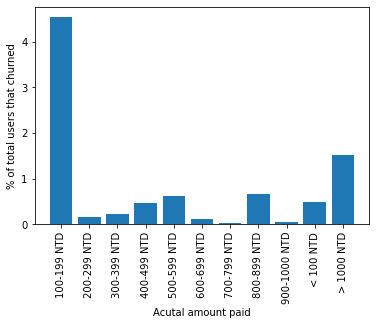

In [311]:
aap = df.groupby('aap').sum()['is_churn'] / totusers *100

plt.bar(aap.index, aap.values)
plt.xlabel('Acutal amount paid')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical', ticks = ['< 100 NTD','100-199 NTD','200-299 NTD','300-399 NTD','400-499 NTD','500-599 NTD','600-699 NTD','700-799 NTD','800-899 NTD','900-1000 NTD','> 1000 NTD'])
plt.show()

In [312]:
df.loc[df['plan_list_price'].between(0,99, 'both'),'plp'] = '< 100 NTD'
df.loc[df['plan_list_price'].between(100,199, 'both'),'plp'] = '100-199 NTD'
df.loc[df['plan_list_price'].between(200,299, 'both'),'plp'] = '200-299 NTD'
df.loc[df['plan_list_price'].between(300,399, 'both'),'plp'] = '300-399 NTD'
df.loc[df['plan_list_price'].between(400,499, 'both'),'plp'] = '400-499 NTD'
df.loc[df['plan_list_price'].between(500,599, 'both'),'plp'] = '500-599 NTD'
df.loc[df['plan_list_price'].between(600,699, 'both'),'plp'] = '600-699 NTD'
df.loc[df['plan_list_price'].between(700,799, 'both'),'plp'] = '700-799 NTD'
df.loc[df['plan_list_price'].between(800,899, 'both'),'plp'] = '800-899 NTD'
df.loc[df['plan_list_price'].between(900,1000, 'both'),'plp'] = '900-1000 NTD'
df.loc[df['plan_list_price'].between(1000,9999, 'both'),'plp'] = '> 1000 NTD'

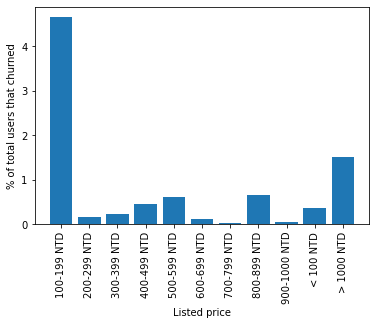

In [313]:
plp = df.groupby('plp').sum()['is_churn'] / totusers *100

plt.bar(plp.index, plp.values)
plt.xlabel('Listed price')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()


# both plots seem to resemble each other - makes sense since acutal amount paid vs listed price is almost always the same.
# We will use acutal amount paid as the depedent variable.

In [314]:
df['ppd'] = df['payment_plan_days']
ppdorder = df.sort_values(by = 'ppd')['ppd'].values
df.loc[df['payment_plan_days'] > 365,'ppd'] = '> 365'

In [316]:
df['ppd'] = df.ppd.astype(str)

In [ ]:
df.dtypes

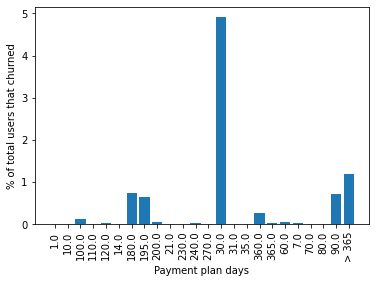

In [317]:
x = df.groupby('ppd').sum()['is_churn'] / totusers *100

plt.bar(x.index, x.values)
plt.xlabel('Payment plan days')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

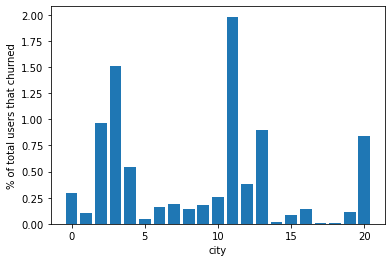

In [318]:
city = df.groupby('city').sum()['is_churn'] / totusers * 100
plt.bar(np.arange(len(list(city.index))), list(city))
plt.xlabel('city')
plt.ylabel('% of total users that churned')
plt.show()
# no clear correlation, although cities #13 and #5 show high amounts of churned users, possibly due to population

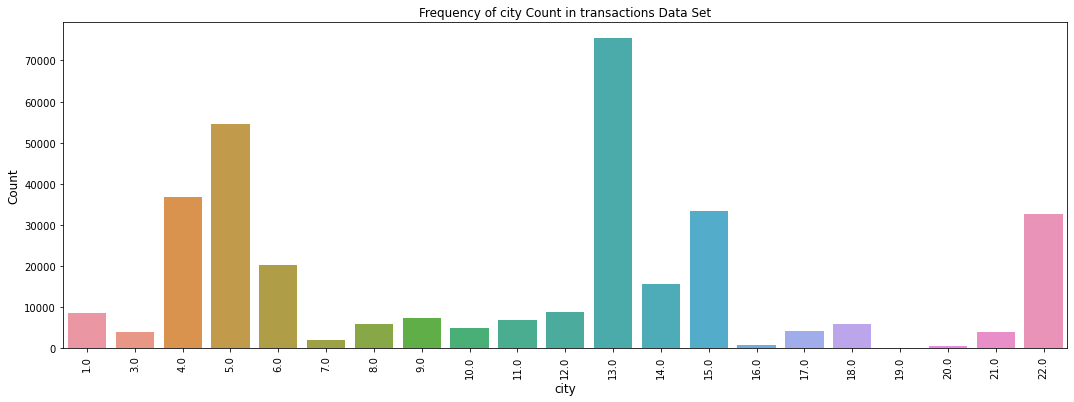

In [319]:
plt.figure(figsize=(18,6))
sns.countplot(x="city", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of city Count in transactions Data Set", fontsize=12)
plt.show()

# confirmed those cities have higher subscriber counts, indicating higher population

Text(0, 0.5, '% of total users that churned')

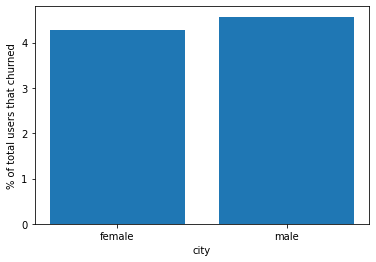

In [320]:
gender = df.groupby('gender').sum()['is_churn'] /totusers * 100
plt.bar(list(gender.index),list(gender))
plt.xlabel('city')
plt.ylabel('% of total users that churned')

# no clear correlation, although male churn sum is slightly higher than female, possibly due to there being more male subscribers

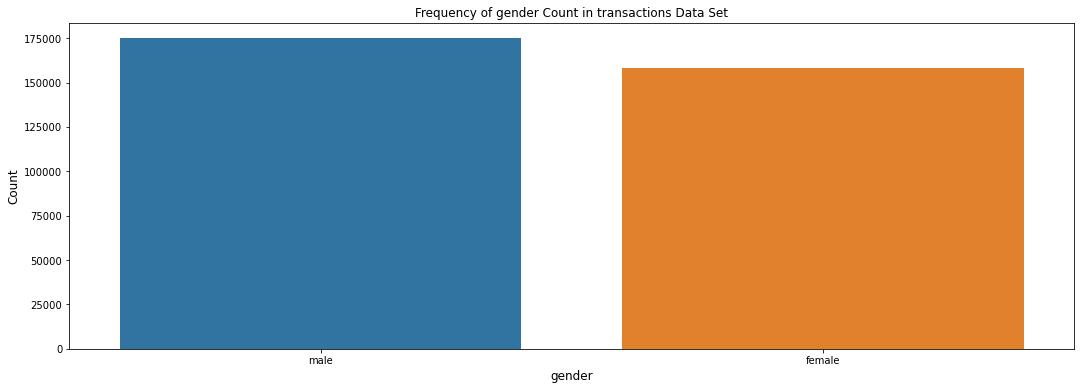

In [321]:
plt.figure(figsize=(18,6))
sns.countplot(x="gender", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.title("Frequency of gender Count in transactions Data Set", fontsize=12)
plt.show()

# more male subsribers than femaale subscribers.

C:\Users\marsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, '11.0'),
  Text(1, 0, '12.0'),
  Text(2, 0, '13.0'),
  Text(3, 0, '14.0'),
  Text(4, 0, '15.0'),
  Text(5, 0, '16.0'),
  Text(6, 0, '17.0'),
  Text(7, 0, '18.0'),
  Text(8, 0, '19.0'),
  Text(9, 0, '20.0'),
  Text(10, 0, '21.0'),
  Text(11, 0, '22.0'),
  Text(12, 0, '23.0'),
  Text(13, 0, '24.0'),
  Text(14, 0, '25.0'),
  Text(15, 0, '26.0'),
  Text(16, 0, '27.0'),
  Text(17, 0, '28.0'),
  Text(18, 0, '29.0'),
  Text(19, 0, '30.0'),
  Text(20, 0, '31.0'),
  Text(21, 0, '32.0'),
  Text(22, 0, '33.0'),
  Text(23, 0, '34.0'),
  Text(24, 0, '35.0'),
  Text(25, 0, '36.0'),
  Text

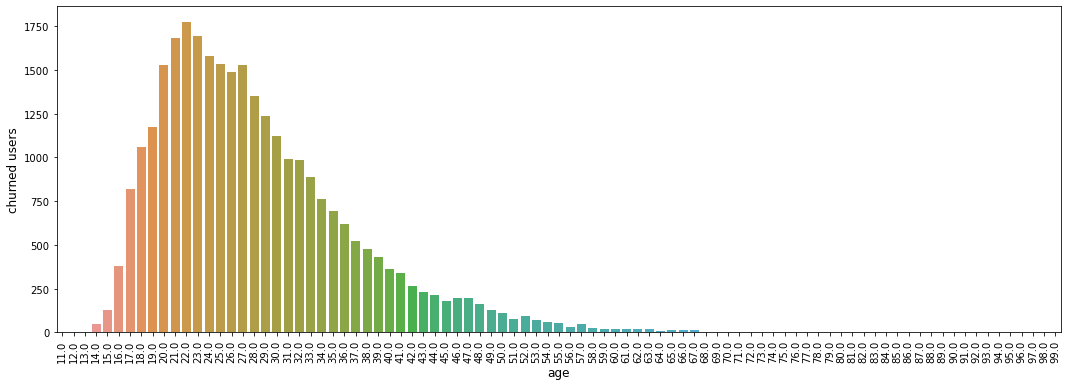

In [322]:
age = df.groupby('age').sum()['is_churn']
plt.figure(figsize=(18,6))
sns.barplot(age.index, age.values), age
plt.xlabel('age',fontsize=12)
plt.ylabel('churned users',fontsize=12)
plt.xticks(rotation='vertical')

# Correlation between age and churn is most likely due to pool of subscribers who are middle-aged

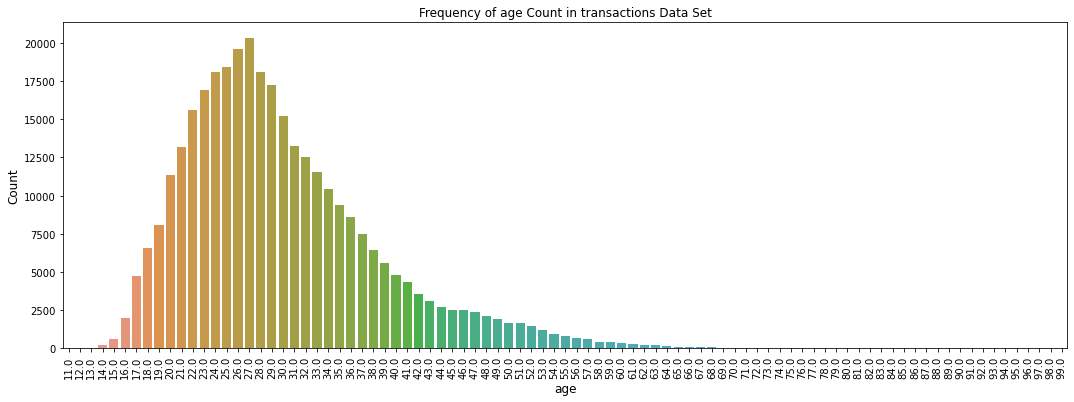

In [323]:
plt.figure(figsize=(18,6))
sns.countplot(x="age", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('age', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of age Count in transactions Data Set", fontsize=12)
plt.show()

In [330]:
cat = df.drop(columns = ['total_secs','percent_25','percent_50','percent_100'])
cat = cat.rename(columns = {'year': 'reg_year'})


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [367]:
from dython.nominal import associations
cat

,userid,is_churn,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,listen_date,num_unq,reg_year,aap,plp,ppd
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23,36.0,30.0,180.0,180.0,0.0,2017-03-11,2017-04-11,0.0,2017-03-20,9.0,2013,100-199 NTD,100-199 NTD,30.0
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27,17.0,90.0,300.0,300.0,0.0,2017-03-11,2017-06-15,0.0,2017-03-31,82.0,2013,300-399 NTD,300-399 NTD,90.0
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25,41.0,30.0,99.0,99.0,1.0,2016-10-01,2017-09-18,0.0,2017-03-31,62.0,2014,< 100 NTD,< 100 NTD,30.0
3,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.0,28.0,female,3.0,2014-02-02,38.0,410.0,1788.0,1788.0,0.0,2017-03-24,2018-05-13,0.0,2017-03-31,72.0,2014,> 1000 NTD,> 1000 NTD,> 365
4,dW/tPZMDh2Oz/ksduEctJbsz0MXw3kay/1AlZCq3EbI=,1,13.0,21.0,female,9.0,2014-02-12,38.0,90.0,477.0,477.0,0.0,2017-03-07,2017-07-07,0.0,2017-03-31,99.0,2014,400-499 NTD,400-499 NTD,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333297,SjVZDYaiKgEHpFX1PcFDS94b9CFdaHjg78rfumtm/F4=,0,15.0,19.0,male,9.0,2011-08-23,39.0,30.0,149.0,149.0,1.0,2017-02-28,2017-05-20,0.0,2017-03-30,50.0,2011,100-199 NTD,100-199 NTD,30.0
333298,5NE9tsGhg7HbFNMdPT+3tytaIKG5013bBQG2vQTe+OI=,0,4.0,23.0,female,9.0,2011-08-26,37.0,30.0,149.0,149.0,1.0,2017-03-26,2017-04-25,0.0,2017-03-29,26.0,2011,100-199 NTD,100-199 NTD,30.0
333299,/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=,0,8.0,25.0,female,7.0,2011-08-30,41.0,30.0,149.0,149.0,1.0,2017-03-17,2017-04-17,0.0,2017-03-31,96.0,2011,100-199 NTD,100-199 NTD,30.0
333300,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,13.0,28.0,male,7.0,2011-08-31,40.0,30.0,149.0,149.0,1.0,2017-03-04,2017-04-03,0.0,2017-03-31,70.0,2011,100-199 NTD,100-199 NTD,30.0


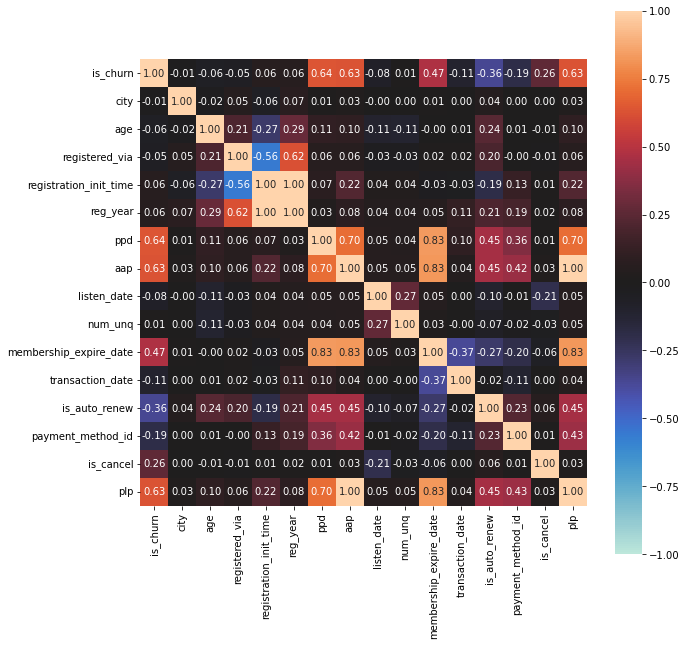

{'corr':                         is_churn      city       age  registered_via  \
 is_churn                1.000000 -0.009742 -0.060695       -0.052891   
 city                   -0.009742  1.000000 -0.019095        0.048452   
 age                    -0.060695 -0.019095  1.000000        0.209759   
 registered_via         -0.052891  0.048452  0.209759        1.000000   
 registration_init_time  0.057976 -0.058796 -0.273492       -0.560098   
 reg_year                0.062298  0.071096  0.286306        0.618567   
 ppd                     0.638456  0.014358  0.107061        0.058652   
 aap                     0.630869  0.026350  0.096081        0.055872   
 listen_date            -0.075940 -0.000855 -0.108630       -0.029477   
 num_unq                 0.012997  0.003573 -0.112890       -0.025879   
 membership_expire_date  0.469034  0.010893 -0.000105        0.019461   
 transaction_date       -0.106081  0.000140  0.007686        0.017775   
 is_auto_renew          -0.363580  0.039479

In [369]:
associations(cat[['is_churn','city','age','registered_via','registration_init_time',
                  'reg_year','ppd','aap','listen_date','num_unq','membership_expire_date',
                  'transaction_date','is_auto_renew','payment_method_id','is_cancel','plp']], figsize = (10,10))

# correlation between churn rate and payment info, as well as with membership expire date. 

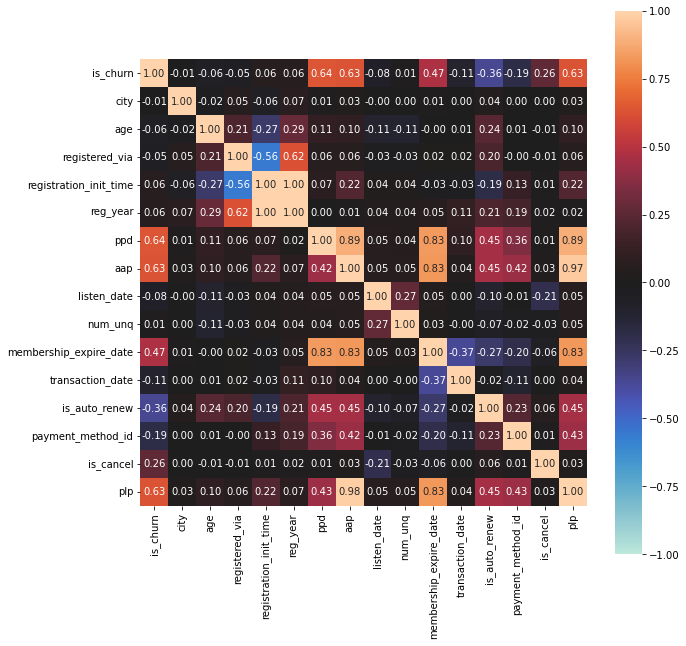

{'corr':                         is_churn      city       age  registered_via  \
 is_churn                1.000000 -0.009742 -0.060695       -0.052891   
 city                   -0.009742  1.000000 -0.019095        0.048452   
 age                    -0.060695 -0.019095  1.000000        0.209759   
 registered_via         -0.052891  0.048452  0.209759        1.000000   
 registration_init_time  0.057976 -0.058796 -0.273492       -0.560098   
 reg_year                0.062298  0.071096  0.286306        0.618567   
 ppd                     0.638456  0.014358  0.107061        0.058652   
 aap                     0.630869  0.026350  0.096081        0.055872   
 listen_date            -0.075940 -0.000855 -0.108630       -0.029477   
 num_unq                 0.012997  0.003573 -0.112890       -0.025879   
 membership_expire_date  0.469034  0.010893 -0.000105        0.019461   
 transaction_date       -0.106081  0.000140  0.007686        0.017775   
 is_auto_renew          -0.363580  0.039479

In [370]:
associations(cat[['is_churn','city','age','registered_via','registration_init_time',
                  'reg_year','ppd','aap','listen_date','num_unq','membership_expire_date',
                  'transaction_date','is_auto_renew','payment_method_id','is_cancel','plp']], nom_nom_assoc = 'theil', figsize = (10,10))


In [16]:
df[df['plan_list_price'] != df.actual_amount_paid]
df['actual_paid_vs_price'] = df['plan_list_price'] - df['actual_amount_paid']

In [17]:
df[df['actual_paid_vs_price'] != 0]

,userid,is_churn,city,age,gender,registered_via,registration_init_time,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,registration_day,actual_paid_vs_price
188,W41+ciQWilt3uyS1RROteyZPl6nD0CL9byyZOm6yORA=,1,13.0,29.0,male,7.0,2015-10-10,41.0,30.0,149.0,99.0,1.0,2016-10-09,2017-10-16,0.0,2017-03-31,67.0,105951.043,0.195548,0.085851,0.661367,2868.0,50.0
601,HgI3yHdD5h9UiTUQAdnqUAa26IKPDSkhhl7P7ofe4Mc=,1,12.0,26.0,female,4.0,2015-10-07,40.0,30.0,149.0,0.0,1.0,2017-03-05,2017-04-04,0.0,2017-03-30,58.0,86389.801,0.179954,0.052392,0.751708,2871.0,149.0
635,GUX6AIQLPHXswBsRxiqBXGZjxTQVfq2ydj4BkcNWKmY=,1,22.0,29.0,female,4.0,2017-02-20,40.0,30.0,149.0,0.0,1.0,2017-03-28,2017-04-27,0.0,2017-03-31,118.0,389474.147,0.027336,0.006357,0.963764,2369.0,149.0
637,ypxSlQxAZVbmP5jBZfkO8ZbkgrSep1GbGT6qzt4URMk=,1,9.0,32.0,female,9.0,2004-05-04,40.0,30.0,149.0,0.0,1.0,2017-03-11,2017-04-10,0.0,2017-03-31,86.0,79958.481,0.199571,0.122318,0.628755,7044.0,149.0
754,W43pkl9N0JBdZ9WMtmnS1/n0Kfiq79wQJg7XRdov+qw=,1,22.0,20.0,male,4.0,2015-12-26,30.0,30.0,149.0,0.0,1.0,2017-03-22,2017-04-21,0.0,2017-03-31,59.0,272488.990,0.138117,0.025463,0.820988,2791.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329606,ttVg+Up3bvnmPmH5DJMJ3iLOuLMGGMGjBnLH/5xRtUo=,0,22.0,19.0,female,4.0,2016-11-22,40.0,30.0,149.0,0.0,1.0,2017-03-01,2017-03-31,0.0,2017-03-29,150.0,75599.255,0.347122,0.035971,0.591727,2459.0,149.0
331537,AzOJbb+RXgvwWWiZGZ1hwtfSgP83gq5ybZTSBd8RLI0=,0,13.0,28.0,male,9.0,2009-06-04,23.0,30.0,149.0,99.0,1.0,2017-03-31,2017-04-30,0.0,2017-03-31,17.0,78465.016,0.085333,0.018667,0.890667,5187.0,50.0
331678,HrQN6eOeXX9p1sUFfnbAJ2/idXKksP3hPhjmxF+L294=,0,13.0,23.0,female,9.0,2011-01-19,40.0,30.0,149.0,0.0,1.0,2017-03-26,2017-04-28,0.0,2017-03-31,50.0,170853.880,0.106784,0.026382,0.859296,4593.0,149.0
332504,BNHk/6i5Q0EahDTJ8abyvpa9lBfQ3D5n9nK7zve0I6A=,0,22.0,23.0,male,9.0,2015-11-01,23.0,30.0,149.0,99.0,1.0,2017-02-28,2017-05-17,0.0,2017-03-31,227.0,822798.490,0.005110,0.001503,0.989179,2846.0,50.0


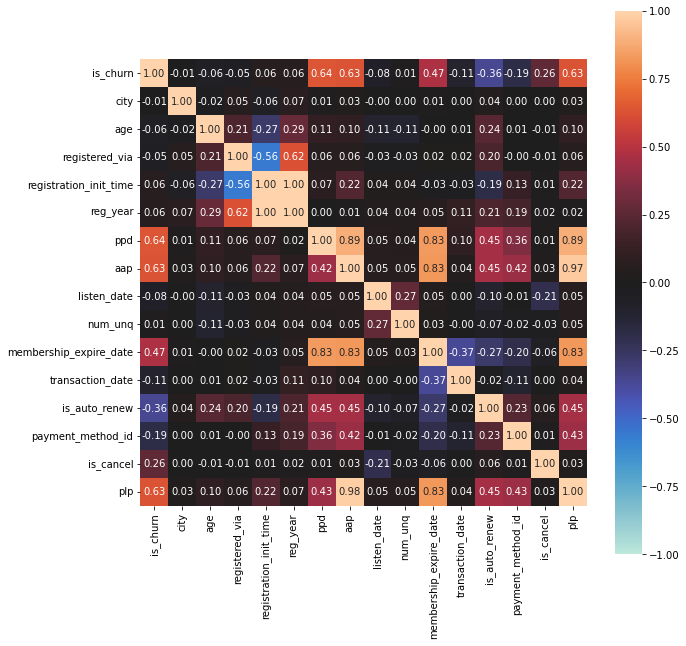

{'corr':                         is_churn      city       age  registered_via  \
 is_churn                1.000000 -0.009742 -0.060695       -0.052891   
 city                   -0.009742  1.000000 -0.019095        0.048452   
 age                    -0.060695 -0.019095  1.000000        0.209759   
 registered_via         -0.052891  0.048452  0.209759        1.000000   
 registration_init_time  0.057976 -0.058796 -0.273492       -0.560098   
 reg_year                0.062298  0.071096  0.286306        0.618567   
 ppd                     0.638456  0.014358  0.107061        0.058652   
 aap                     0.630869  0.026350  0.096081        0.055872   
 listen_date            -0.075940 -0.000855 -0.108630       -0.029477   
 num_unq                 0.012997  0.003573 -0.112890       -0.025879   
 membership_expire_date  0.469034  0.010893 -0.000105        0.019461   
 transaction_date       -0.106081  0.000140  0.007686        0.017775   
 is_auto_renew          -0.363580  0.039479

In [376]:
cat['membership_duration'] = cat['membership_expire_date']-  cat['transaction_date']
cat



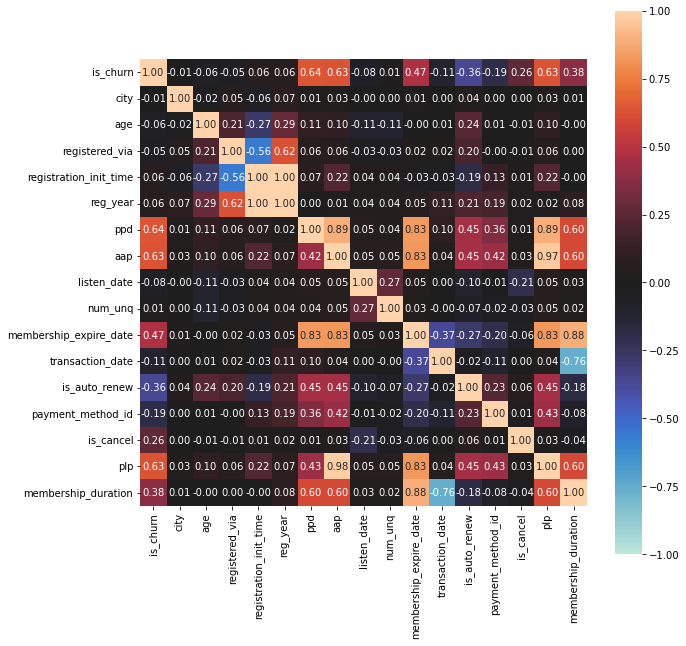

{'corr':                         is_churn      city       age  registered_via  \
 is_churn                1.000000 -0.009742 -0.060695       -0.052891   
 city                   -0.009742  1.000000 -0.019095        0.048452   
 age                    -0.060695 -0.019095  1.000000        0.209759   
 registered_via         -0.052891  0.048452  0.209759        1.000000   
 registration_init_time  0.057976 -0.058796 -0.273492       -0.560098   
 reg_year                0.062298  0.071096  0.286306        0.618567   
 ppd                     0.638456  0.014358  0.107061        0.058652   
 aap                     0.630869  0.026350  0.096081        0.055872   
 listen_date            -0.075940 -0.000855 -0.108630       -0.029477   
 num_unq                 0.012997  0.003573 -0.112890       -0.025879   
 membership_expire_date  0.469034  0.010893 -0.000105        0.019461   
 transaction_date       -0.106081  0.000140  0.007686        0.017775   
 is_auto_renew          -0.363580  0.039479

In [380]:
cat.membership_duration = cat.membership_duration / np.timedelta64(1, 'D')
cat
associations(cat[['is_churn','city','age','registered_via','registration_init_time',
                  'reg_year','ppd','aap','listen_date','num_unq','membership_expire_date',
                  'transaction_date','is_auto_renew','payment_method_id','is_cancel','plp',
                 'membership_duration']], nom_nom_assoc = 'theil', figsize = (10,10))

(0.0, 550.0)

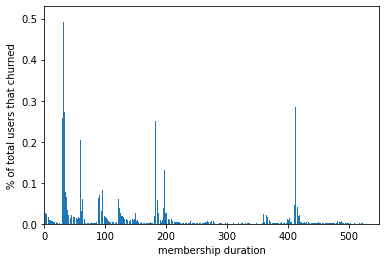

In [382]:
memdur = cat.groupby('membership_duration').sum()['is_churn'] /totusers * 100
plt.bar(list(memdur.index),list(memdur))
plt.xlabel('membership duration')
plt.ylabel('% of total users that churned')
plt.xlim([0,550])

In [391]:
memdur.sort_values(ascending = False)

# looks like monthly subscribers tend to churn more often.

membership_duration
31.0      0.504647
32.0      0.492046
90.0      0.369035
410.0     0.357334
195.0     0.309929
            ...   
965.0     0.000000
964.0     0.000000
963.0     0.000000
537.0     0.000000
2780.0    0.000000
Name: is_churn, Length: 1158, dtype: float64